In [1]:
!nvidia-smi

Thu May 29 15:32:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lbquctrung/worksite-safety-monitoring-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/worksite-safety-monitoring-dataset


In [3]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_dir = '/kaggle/input/worksite-safety-monitoring-dataset/Worksite-Safety-Monitoring-Dataset/train'
test_dir = '/kaggle/input/worksite-safety-monitoring-dataset/Worksite-Safety-Monitoring-Dataset/test'
valid_dir = '/kaggle/input/worksite-safety-monitoring-dataset/Worksite-Safety-Monitoring-Dataset/valid'

float32 0.0 1.0
float32 0.0 0.8705883
float32 0.0 0.882353
float32 0.0 1.0
float32 0.0 0.8862746
float32 0.0 1.0
float32 0.0 1.0
float32 0.0 1.0
float32 0.0 1.0


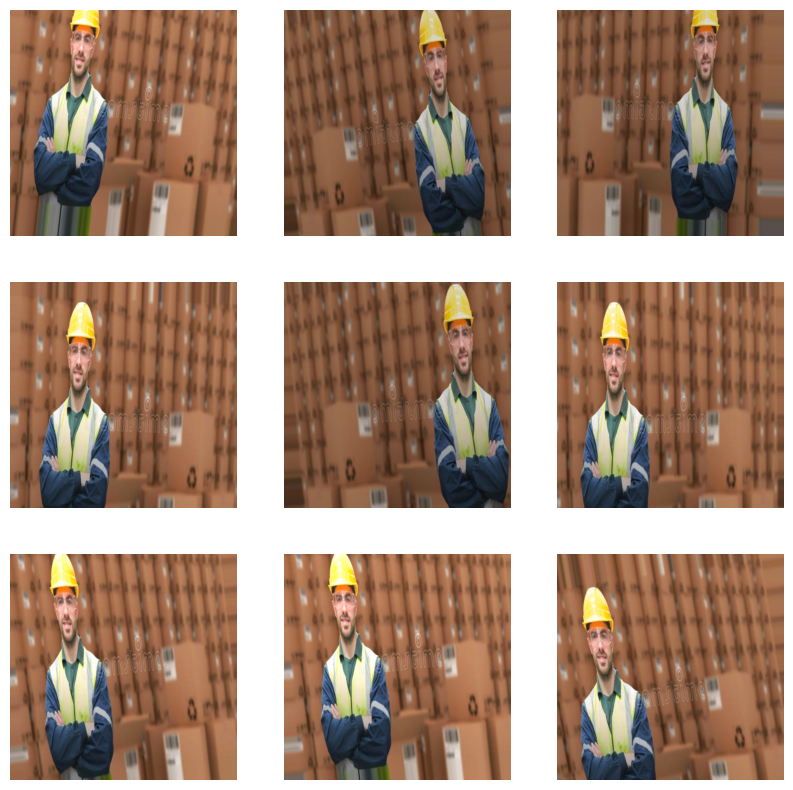

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_datagen1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.85, 1.15],
    horizontal_flip=True,
    fill_mode='nearest'
)

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     brightness_range=[0.9, 1.1],  # Aman
#     fill_mode='nearest'
# )

test_datagen1 = ImageDataGenerator(rescale=1./255)
valid_datagen1 = ImageDataGenerator(rescale=1./255)

img = load_img('/root/.cache/kagglehub/datasets/lbquctrung/worksite-safety-monitoring-dataset/versions/1/Worksite-Safety-Monitoring-Dataset/train/safe/108.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
plt.figure(figsize=(10, 10))
for batch in train_datagen1.flow(x, batch_size=1):
    print(batch[0].dtype, batch[0].min(), batch[0].max())
    plt.subplot(3, 3, i+1)
    plt.imshow(batch[0])
    plt.axis('off')
    i += 1
    if i % 9 == 0:
        break
plt.show()


float32 0.0 1.0
float32 0.0 0.85098046
float32 0.0 1.0
float32 0.0 1.0
float32 0.0 1.0
float32 0.0 1.0
float32 0.0 0.9058824
float32 0.0 1.0
float32 0.0 0.91372555


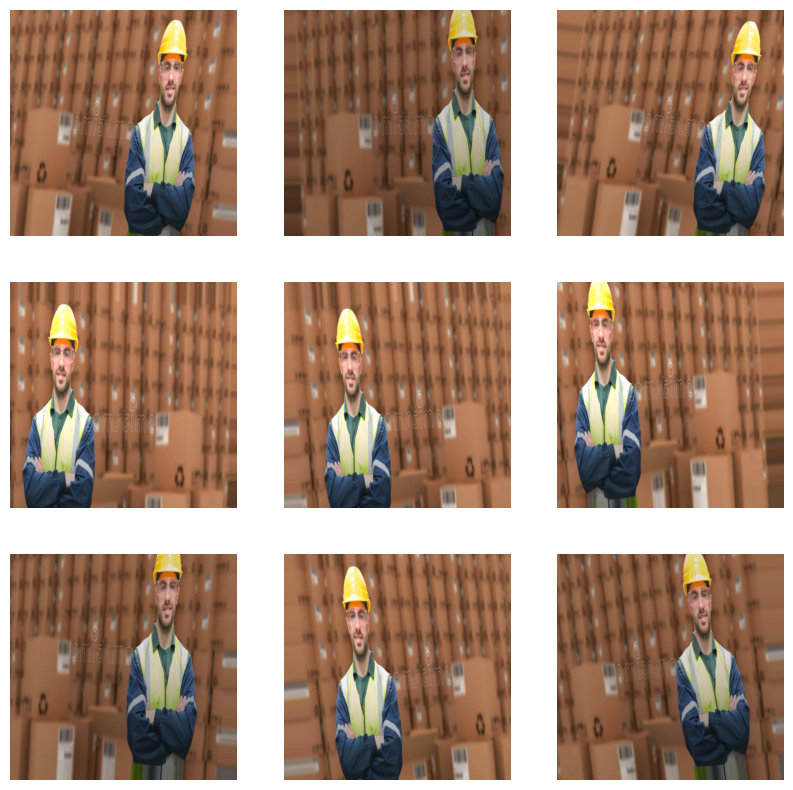

NameError: name 'train_datagen1' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.85, 1.15],
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

img = load_img('/root/.cache/kagglehub/datasets/lbquctrung/worksite-safety-monitoring-dataset/versions/1/Worksite-Safety-Monitoring-Dataset/train/safe/108.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
plt.figure(figsize=(10, 10))
for batch in train_datagen.flow(x, batch_size=1):
    print(batch[0].dtype, batch[0].min(), batch[0].max())
    plt.subplot(3, 3, i+1)
    plt.imshow(batch[0])
    plt.axis('off')
    i += 1
    if i % 9 == 0:
        break
plt.show()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True,
)

test_generator = test_datagen1.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True,
)

valid_generator = valid_datagen1.flow_from_directory(
    valid_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True,
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.85, 1.15],
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True,
)

NameError: name 'batch_size' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import cv2

tf.config.run_functions_eagerly(True)

def build_model_bn_dropout():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_model_no_bn():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_model_no_dropout():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_model_plain():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model
def build_model_gap_only():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


def build_model_gap_dropout():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


def build_model_gap_bn():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


def build_model_gap_bn_dropout():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_and_save(model, optimizer_type, learning_rate, optimizer_name, model_name, train_generator, valid_generator, epoch=10):

    os.makedirs("models", exist_ok=True)
    # os.makedirs("histories", exist_ok=True)

    optimizer = optimizer_type(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    print(f"\n===== MODEL SUMMARY: {model_name.upper()} dengan {optimizer_name.upper()} =====")
    model.summary()

    lr = learning_rate

    experiment_name = f"{optimizer_name}_epoch{epoch}_lr{lr:.0e}_{model_name}"

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint = callbacks.ModelCheckpoint(f"models/best_model_{experiment_name}.h5", save_best_only=True)

    history = model.fit(train_generator,validation_data=valid_generator,epochs=epoch,callbacks=[early_stop, checkpoint])

    # with open(f"histories/history_{experiment_name}.json", 'w') as f:
    #   json.dump(history.history, f, default=safe_convert)

    # with open(f"histories/history_{experiment_name}.json", 'w') as f:
    #   json.dump(history.history, f)


    return experiment_name, history

def plot_results(results):
    plt.figure(figsize=(14,6))
    plt.subplot(2, 1, 1)
    for name, hist in results.items():
      plt.plot(hist.history['accuracy'], linestyle='--', label=f'{name} Train Accuracy')
      plt.plot(hist.history['val_accuracy'], linestyle='-', label=f'{name} Valid Accuracy')
    plt.title("Perbandingan Training dan Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 1, 2)
    for name, hist in results.items():
      plt.plot(hist.history['loss'], linestyle='--', label=f'{name} Train Loss')
      plt.plot(hist.history['val_loss'], linestyle='-', label=f'{name} Validation Loss')
    plt.title("Train dan Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


optimizers_configs = {
    'adam_1e-4': (optimizers.Adam, 1e-4),
    'adam_1e-5': (optimizers.Adam, 1e-5),
    'sgd_1e-2': (optimizers.SGD, 1e-2),
    'sgd_1e-3': (optimizers.SGD, 1e-3)
}


batch_sizes = [16, 32]
epochs_list = [10, 15, 20]

model_builders = {
    'plain': build_model_plain,
    'dropout': build_model_no_bn,
    'bn': build_model_no_dropout,
    'bn_dropout': build_model_bn_dropout,
    'gap_only': build_model_gap_only,
    'gap_dropout': build_model_gap_dropout,
    'gap_bn': build_model_gap_bn,
    'gap_bn_dropout': build_model_gap_bn_dropout
}

results = {}


for batch_size in batch_sizes:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )
    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    for epoch in epochs_list:
        for opt_name, (optimizer_type, learning_rate) in optimizers_configs.items():
            for model_name, builder in model_builders.items():
                print(f"\nTraining model: {model_name} | Optimizer: {opt_name} | Batch: {batch_size} | Epochs: {epoch}")
                model = builder() # Build a new model for each combination
                exp_name, hist = train_and_save(
                    model=model,
                    optimizer_type=optimizer_type, # Pass type and lr
                    learning_rate=learning_rate,
                    optimizer_name=opt_name,
                    model_name=f"{model_name}_bs{batch_size}",
                    train_generator=train_generator,
                    valid_generator=valid_generator,
                    epoch=epoch
                )
                results[exp_name] = hist

plot_results(results)
#     os.makedirs("models", exist_ok=True)
#     # os.makedirs("histories", exist_ok=True)

#     model.compile(
#         optimizer=optimizer,
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#     )

#     print(f"\n===== MODEL SUMMARY: {model_name.upper()} with {optimizer_name.upper()} =====")
#     model.summary()

#     lr = 0.001
#     if hasattr(optimizer, 'learning_rate'):
#       try:
#         lr = float(optimizer.learning_rate)
#       except Exception:
#         pass

#     experiment_name = f"{optimizer_name}_epoch{epoch}_lr{lr:.0e}_{model_name}"

#     early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#     checkpoint = callbacks.ModelCheckpoint(f"models/best_model_{experiment_name}.h5", save_best_only=True)

#     history = model.fit(train_generator,validation_data=valid_generator,epochs=epoch,callbacks=[early_stop, checkpoint])

#     # with open(f"histories/history_{experiment_name}.json", 'w') as f:
#     #   json.dump(history.history, f, default=safe_convert)

#     # with open(f"histories/history_{experiment_name}.json", 'w') as f:
#     #   json.dump(history.history, f)

#     return experiment_name, history

# def plot_results(results):
#     plt.figure(figsize=(14,6))
#     plt.subplot(2, 1, 1)
#     for name, hist in results.items():
#       plt.plot(hist.history['accuracy'], linestyle='--', label=f'{name} Train Accuracy')
#       plt.plot(hist.history['val_accuracy'], linestyle='-', label=f'{name} Valid Accuracy')
#     plt.title("Perbandingan Training dan Validation Accuracy")
#     plt.xlabel("Epoch")
#     plt.ylabel("Accuracy")
#     plt.legend()
#     plt.grid(True)
#     plt.subplot(2, 1, 2)
#     for name, hist in results.items():
#       plt.plot(hist.history['loss'], linestyle='--', label=f'{name} Train Loss')
#       plt.plot(hist.history['val_loss'], linestyle='-', label=f'{name} Validation Loss')
#     plt.title("Train dan Validation Loss")
#     plt.xlabel("Epoch")
#     plt.ylabel("Loss")
#     plt.legend()
#     plt.grid(True)

#     plt.tight_layout()
#     plt.show()


# optimizers_dict = {
#     'adam_1e-4': optimizers.Adam(learning_rate=1e-4),
#     'adam_1e-5': optimizers.Adam(learning_rate=1e-5),
#     'sgd_1e-2': optimizers.SGD(learning_rate=1e-2, momentum=0.9),
#     'sgd_1e-3': optimizers.SGD(learning_rate=1e-3, momentum=0.9)
# }

# batch_sizes = [16, 32]
# epochs_list = [10, 15, 20]

# model_builders = {
#     'plain': build_model_plain,
#     'dropout': build_model_no_bn,
#     'bn': build_model_no_dropout,
#     'bn_dropout': build_model_bn_dropout,
#     'gap_only': build_model_gap_only,
#     'gap_dropout': build_model_gap_dropout,
#     'gap_bn': build_model_gap_bn,
#     'gap_bn_dropout': build_model_gap_bn_dropout
# }

# results = {}

# for batch_size in batch_sizes:
#     train_generator = train_datagen.flow_from_directory(
#         train_dir,
#         target_size=(224, 224),
#         batch_size=batch_size,
#         class_mode='binary',
#         color_mode="rgb",
#         shuffle=True
#     )
#     valid_generator = valid_datagen.flow_from_directory(
#         valid_dir,
#         target_size=(224, 224),
#         batch_size=batch_size,
#         class_mode='binary',
#         color_mode="rgb",
#         shuffle=True
#     )

#     for epoch in epochs_list:
#         for opt_name, optimizer in optimizers_dict.items():
#             for model_name, builder in model_builders.items():
#                 print(f"\nTraining model: {model_name} | Optimizer: {opt_name} | Batch: {batch_size} | Epochs: {epoch}")
#                 model = builder()
#                 exp_name, hist = train_and_save(
#                 model=model,
#                 optimizer=optimizer,
#                 optimizer_name=opt_name,
#                 model_name=f"{model_name}_bs{batch_size}",
#                 train_generator=train_generator,
#                 valid_generator=valid_generator,
#                 epoch=epoch)
#                 results[exp_name] = hist

# plot_results(results)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.

Training model: plain | Optimizer: adam_1e-4 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: PLAIN_BS16 dengan ADAM_1E-4 =====


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,476,545 (196.37 MB)

 Trainable params: 51,475,521 (196.36 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.5133 - loss: 0.8699

102/102 ━━━━━━━━━━━━━━━━━━━━ 47s 417ms/step - accuracy: 0.5137 - loss: 0.8692 - val_accuracy: 0.5750 - val_loss: 0.7144
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.5714 - loss: 0.7425

102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 358ms/step - accuracy: 0.5716 - loss: 0.7424 - val_accuracy: 0.5850 - val_loss: 0.6791
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5813 - loss: 0.7441

102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 361ms/step - accuracy: 0.5813 - loss: 0.7440 - val_accuracy: 0.6000 - val_loss: 0.6650
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5926 - loss: 0.7176

102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - accuracy: 0.5928 - loss: 0.7174 - val_accuracy: 0.6550 - val_loss: 0.6412
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 35s 301ms/step - accuracy: 0.6235 - loss: 0.6861 - val_accuracy: 0.6350 - val_loss: 0.6424
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 296ms/step - accuracy: 0.6293 - loss: 0.6845 - val_accuracy: 0.5900 - val_loss: 0.7240
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 32s 310ms/step - accuracy: 0.6497 - loss: 0.6712 - val_accuracy: 0.5300 - val_loss: 0.8398
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 32s 310ms/step - accuracy: 0.6302 - loss: 0.6913 - val_accuracy: 0.6000 - val_loss: 0.6872
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.6540 - loss: 0.6405 - val_accuracy: 0.5000 - val_loss: 1.8682

Training model: dropout | Optimizer: adam_1e-4 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: DROPOUT_BS16 dengan ADAM_1E-4 =====


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,474,497 (196.36 MB)

 Trainable params: 51,474,497 (196.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.5093 - loss: 0.9467

102/102 ━━━━━━━━━━━━━━━━━━━━ 38s 374ms/step - accuracy: 0.5092 - loss: 0.9452 - val_accuracy: 0.4900 - val_loss: 0.6925
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.5400 - loss: 0.6872

102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 359ms/step - accuracy: 0.5400 - loss: 0.6871 - val_accuracy: 0.6050 - val_loss: 0.6848
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.5557 - loss: 0.6775

102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 364ms/step - accuracy: 0.5557 - loss: 0.6775 - val_accuracy: 0.5650 - val_loss: 0.6814
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.6025 - loss: 0.6616

102/102 ━━━━━━━━━━━━━━━━━━━━ 39s 378ms/step - accuracy: 0.6023 - loss: 0.6617 - val_accuracy: 0.5800 - val_loss: 0.6744
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.6085 - loss: 0.6556

102/102 ━━━━━━━━━━━━━━━━━━━━ 39s 382ms/step - accuracy: 0.6084 - loss: 0.6556 - val_accuracy: 0.5850 - val_loss: 0.6723
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.6263 - loss: 0.6430

102/102 ━━━━━━━━━━━━━━━━━━━━ 39s 380ms/step - accuracy: 0.6263 - loss: 0.6431 - val_accuracy: 0.6000 - val_loss: 0.6610
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.6280 - loss: 0.6369

102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 381ms/step - accuracy: 0.6281 - loss: 0.6369 - val_accuracy: 0.6650 - val_loss: 0.6486
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.6204 - loss: 0.6404

102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 362ms/step - accuracy: 0.6205 - loss: 0.6405 - val_accuracy: 0.6450 - val_loss: 0.6452
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.6394 - loss: 0.6285

102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 364ms/step - accuracy: 0.6395 - loss: 0.6285 - val_accuracy: 0.6900 - val_loss: 0.6314
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.6635 - loss: 0.6238 - val_accuracy: 0.6250 - val_loss: 0.6419

Training model: bn | Optimizer: adam_1e-4 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: BN_BS16 dengan ADAM_1E-4 =====


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,477,441 (196.37 MB)

 Trainable params: 51,475,969 (196.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.5850 - loss: 1.2753

102/102 ━━━━━━━━━━━━━━━━━━━━ 43s 417ms/step - accuracy: 0.5851 - loss: 1.2729 - val_accuracy: 0.5300 - val_loss: 0.6950
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 37s 360ms/step - accuracy: 0.6228 - loss: 0.7850 - val_accuracy: 0.5000 - val_loss: 3.4843
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - accuracy: 0.6361 - loss: 0.7626 - val_accuracy: 0.5350 - val_loss: 2.1094
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.6558 - loss: 0.7164 - val_accuracy: 0.5750 - val_loss: 1.2301
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - accuracy: 0.6599 - loss: 0.7117 - val_accuracy: 0.6300 - val_loss: 0.8262
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.6542 - loss: 0.7179

102/102 ━━━━━━━━━━━━━━━━━━━━ 43s 420ms/step - accuracy: 0.6542 - loss: 0.7178 - val_accuracy: 0.6850 - val_loss: 0.6278
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 354ms/step - accuracy: 0.6599 - loss: 0.6905 - val_accuracy: 0.7000 - val_loss: 0.6467
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 355ms/step - accuracy: 0.7155 - loss: 0.6060 - val_accuracy: 0.6700 - val_loss: 0.6503
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 357ms/step - accuracy: 0.6915 - loss: 0.6475 - val_accuracy: 0.6400 - val_loss: 0.7762
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.6820 - loss: 0.6805

102/102 ━━━━━━━━━━━━━━━━━━━━ 44s 430ms/step - accuracy: 0.6820 - loss: 0.6806 - val_accuracy: 0.7300 - val_loss: 0.5414

Training model: bn_dropout | Optimizer: adam_1e-4 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: BN_DROPOUT_BS16 dengan ADAM_1E-4 =====


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,477,441 (196.37 MB)

 Trainable params: 51,475,969 (196.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.5522 - loss: 1.1909

102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 480ms/step - accuracy: 0.5523 - loss: 1.1889 - val_accuracy: 0.5000 - val_loss: 1.6420
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 38s 368ms/step - accuracy: 0.5969 - loss: 0.7826 - val_accuracy: 0.5000 - val_loss: 3.8683
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.6383 - loss: 0.7441

102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 405ms/step - accuracy: 0.6382 - loss: 0.7442 - val_accuracy: 0.5950 - val_loss: 1.2991
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 78s 367ms/step - accuracy: 0.6017 - loss: 0.7880 - val_accuracy: 0.5500 - val_loss: 5.7715
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 377ms/step - accuracy: 0.6599 - loss: 0.6883 - val_accuracy: 0.5650 - val_loss: 8.2821
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - accuracy: 0.6287 - loss: 0.6945 - val_accuracy: 0.5550 - val_loss: 9.0566
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 38s 364ms/step - accuracy: 0.6539 - loss: 0.6766 - val_accuracy: 0.5350 - val_loss: 9.0329
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.6273 - loss: 0.6933 - val_accuracy: 0.5100 - val_loss: 8.1965

Training model: gap_only | Optimizer: adam_1e-4 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: GAP_ONLY_BS16 dengan ADAM_1E-4 =====


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,377 (364.75 KB)

 Trainable params: 93,377 (364.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.4860 - loss: 0.6953

102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 275ms/step - accuracy: 0.4862 - loss: 0.6953 - val_accuracy: 0.5200 - val_loss: 0.6921
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.5295 - loss: 0.6888

102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.5294 - loss: 0.6888 - val_accuracy: 0.5650 - val_loss: 0.6918
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 271ms/step - accuracy: 0.5271 - loss: 0.6889 - val_accuracy: 0.4950 - val_loss: 0.6961
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 273ms/step - accuracy: 0.5491 - loss: 0.6865 - val_accuracy: 0.5050 - val_loss: 0.6927
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.5567 - loss: 0.6834

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 290ms/step - accuracy: 0.5569 - loss: 0.6834 - val_accuracy: 0.5450 - val_loss: 0.6911
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.5787 - loss: 0.6800

102/102 ━━━━━━━━━━━━━━━━━━━━ 39s 274ms/step - accuracy: 0.5787 - loss: 0.6800 - val_accuracy: 0.6000 - val_loss: 0.6862
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 279ms/step - accuracy: 0.5964 - loss: 0.6759 - val_accuracy: 0.4900 - val_loss: 0.6966
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.5879 - loss: 0.6794

102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.5880 - loss: 0.6793 - val_accuracy: 0.5850 - val_loss: 0.6841
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.6129 - loss: 0.6696

102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 274ms/step - accuracy: 0.6129 - loss: 0.6697 - val_accuracy: 0.6000 - val_loss: 0.6814
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.6306 - loss: 0.6666

102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - accuracy: 0.6305 - loss: 0.6667 - val_accuracy: 0.6150 - val_loss: 0.6802

Training model: gap_dropout | Optimizer: adam_1e-4 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: GAP_DROPOUT_BS16 dengan ADAM_1E-4 =====


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,377 (364.75 KB)

 Trainable params: 93,377 (364.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.5033 - loss: 0.6950

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 290ms/step - accuracy: 0.5033 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.5024 - loss: 0.6939

102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 0.5024 - loss: 0.6939 - val_accuracy: 0.5500 - val_loss: 0.6915
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.5416 - loss: 0.6916

102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 280ms/step - accuracy: 0.5415 - loss: 0.6916 - val_accuracy: 0.5050 - val_loss: 0.6915
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.5273 - loss: 0.6889

102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.5273 - loss: 0.6889 - val_accuracy: 0.5800 - val_loss: 0.6897
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.5726 - loss: 0.6869

102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.5727 - loss: 0.6869 - val_accuracy: 0.5350 - val_loss: 0.6885
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.5605 - loss: 0.6831

102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - accuracy: 0.5606 - loss: 0.6831 - val_accuracy: 0.5950 - val_loss: 0.6844
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.5837 - loss: 0.6762

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 289ms/step - accuracy: 0.5837 - loss: 0.6762 - val_accuracy: 0.6050 - val_loss: 0.6818
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.6133 - loss: 0.6657

102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.6131 - loss: 0.6658 - val_accuracy: 0.5700 - val_loss: 0.6811
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.6275 - loss: 0.6668

102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.6274 - loss: 0.6669 - val_accuracy: 0.6000 - val_loss: 0.6800
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.6111 - loss: 0.6698 - val_accuracy: 0.5600 - val_loss: 0.6875

Training model: gap_bn | Optimizer: adam_1e-4 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: GAP_BN_BS16 dengan ADAM_1E-4 =====


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,889 (366.75 KB)

 Trainable params: 93,633 (365.75 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.5790 - loss: 0.6829

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 296ms/step - accuracy: 0.5792 - loss: 0.6829 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6308 - loss: 0.6589

102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - accuracy: 0.6307 - loss: 0.6590 - val_accuracy: 0.5600 - val_loss: 0.6892
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.6011 - loss: 0.6619

102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.6012 - loss: 0.6619 - val_accuracy: 0.5350 - val_loss: 0.6872
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6460 - loss: 0.6457

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.6459 - loss: 0.6457 - val_accuracy: 0.5800 - val_loss: 0.6826
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.6343 - loss: 0.6460

102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.6343 - loss: 0.6460 - val_accuracy: 0.6100 - val_loss: 0.6753
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.6470 - loss: 0.6467 - val_accuracy: 0.5050 - val_loss: 0.8614
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.6454 - loss: 0.6285

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.6454 - loss: 0.6285 - val_accuracy: 0.6400 - val_loss: 0.6596
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 284ms/step - accuracy: 0.6439 - loss: 0.6391 - val_accuracy: 0.5300 - val_loss: 0.8037
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 284ms/step - accuracy: 0.6540 - loss: 0.6275 - val_accuracy: 0.5100 - val_loss: 0.9271
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 301ms/step - accuracy: 0.6586 - loss: 0.6265 - val_accuracy: 0.5100 - val_loss: 0.8449

Training model: gap_bn_dropout | Optimizer: adam_1e-4 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: GAP_BN_DROPOUT_BS16 dengan ADAM_1E-4 =====


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,889 (366.75 KB)

 Trainable params: 93,633 (365.75 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.5505 - loss: 0.6977

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 292ms/step - accuracy: 0.5506 - loss: 0.6977 - val_accuracy: 0.5250 - val_loss: 0.6915
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5675 - loss: 0.6811

102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 299ms/step - accuracy: 0.5678 - loss: 0.6810 - val_accuracy: 0.5750 - val_loss: 0.6892
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6055 - loss: 0.6701

102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 293ms/step - accuracy: 0.6054 - loss: 0.6701 - val_accuracy: 0.6100 - val_loss: 0.6859
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.6129 - loss: 0.6681

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.6128 - loss: 0.6681 - val_accuracy: 0.5650 - val_loss: 0.6846
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.6429 - loss: 0.6532 - val_accuracy: 0.5200 - val_loss: 0.6862
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6170 - loss: 0.6586

102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 295ms/step - accuracy: 0.6170 - loss: 0.6586 - val_accuracy: 0.5800 - val_loss: 0.6752
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6328 - loss: 0.6478

102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 290ms/step - accuracy: 0.6330 - loss: 0.6478 - val_accuracy: 0.5900 - val_loss: 0.6640
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 288ms/step - accuracy: 0.6569 - loss: 0.6409 - val_accuracy: 0.6150 - val_loss: 0.6660
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 299ms/step - accuracy: 0.6514 - loss: 0.6444 - val_accuracy: 0.6100 - val_loss: 0.6772
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6414 - loss: 0.6506

102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 287ms/step - accuracy: 0.6415 - loss: 0.6505 - val_accuracy: 0.6300 - val_loss: 0.6467

Training model: plain | Optimizer: adam_1e-5 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: PLAIN_BS16 dengan ADAM_1E-5 =====


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,476,545 (196.37 MB)

 Trainable params: 51,475,521 (196.36 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.5625 - loss: 0.7529

102/102 ━━━━━━━━━━━━━━━━━━━━ 38s 370ms/step - accuracy: 0.5626 - loss: 0.7529 - val_accuracy: 0.5700 - val_loss: 0.6838
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.5892 - loss: 0.7315

102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 443ms/step - accuracy: 0.5893 - loss: 0.7313 - val_accuracy: 0.5950 - val_loss: 0.6715
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 296ms/step - accuracy: 0.5889 - loss: 0.7504 - val_accuracy: 0.5450 - val_loss: 0.6759
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - accuracy: 0.6172 - loss: 0.6887 - val_accuracy: 0.5300 - val_loss: 0.7856
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.6111 - loss: 0.7402

102/102 ━━━━━━━━━━━━━━━━━━━━ 44s 434ms/step - accuracy: 0.6111 - loss: 0.7400 - val_accuracy: 0.5900 - val_loss: 0.6509
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 307ms/step - accuracy: 0.6383 - loss: 0.6775 - val_accuracy: 0.5600 - val_loss: 0.8022
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6231 - loss: 0.6810

102/102 ━━━━━━━━━━━━━━━━━━━━ 54s 438ms/step - accuracy: 0.6231 - loss: 0.6811 - val_accuracy: 0.6200 - val_loss: 0.6410
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - accuracy: 0.6366 - loss: 0.6784 - val_accuracy: 0.5400 - val_loss: 0.8899
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - accuracy: 0.6442 - loss: 0.6700 - val_accuracy: 0.6350 - val_loss: 0.6501
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - accuracy: 0.6367 - loss: 0.6719 - val_accuracy: 0.5900 - val_loss: 0.6776

Training model: dropout | Optimizer: adam_1e-5 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: DROPOUT_BS16 dengan ADAM_1E-5 =====


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,474,497 (196.36 MB)

 Trainable params: 51,474,497 (196.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.4966 - loss: 0.7730

102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 392ms/step - accuracy: 0.4966 - loss: 0.7727 - val_accuracy: 0.5350 - val_loss: 0.6899
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 312ms/step - accuracy: 0.5027 - loss: 0.7310 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - accuracy: 0.5087 - loss: 0.7082 - val_accuracy: 0.5350 - val_loss: 0.6908
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 296ms/step - accuracy: 0.5165 - loss: 0.6933 - val_accuracy: 0.5800 - val_loss: 0.6905
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 43s 312ms/step - accuracy: 0.5445 - loss: 0.6942 - val_accuracy: 0.5150 - val_loss: 0.6902
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 298ms/step - accuracy: 0.5035 - loss: 0.6958 - val_accuracy: 0.5100 - val_loss: 0.6948

Training model: bn | Optimizer: adam_1e-5 | Batch: 16 | Epochs: 10

===== MODEL SUMMARY: BN_BS16 dengan ADAM_1E-5 =====


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,477,441 (196.37 MB)

 Trainable params: 51,475,969 (196.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.5607 - loss: 1.0268

102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 480ms/step - accuracy: 0.5608 - loss: 1.0264 - val_accuracy: 0.5000 - val_loss: 0.8919
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 70s 366ms/step - accuracy: 0.6300 - loss: 0.8639 - val_accuracy: 0.5000 - val_loss: 1.1272
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.6482 - loss: 0.7995

102/102 ━━━━━━━━━━━━━━━━━━━━ 63s 585ms/step - accuracy: 0.6482 - loss: 0.7993 - val_accuracy: 0.5800 - val_loss: 0.8419
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.6704 - loss: 0.7756

102/102 ━━━━━━━━━━━━━━━━━━━━ 82s 804ms/step - accuracy: 0.6705 - loss: 0.7753 - val_accuracy: 0.6200 - val_loss: 0.7320
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.6622 - loss: 0.7352

102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 478ms/step - accuracy: 0.6621 - loss: 0.7353 - val_accuracy: 0.5850 - val_loss: 0.7099
Epoch 6/10
 15/102 ━━━━━━━━━━━━━━━━━━━━ 28s 325ms/step - accuracy: 0.6874 - loss: 0.7314

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import cv2

def build_resnet_model(input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    return model


configs = [
    {"epoch": 15, "batch_size": 32, "lr": 1e-3},
    {"epoch": 15, "batch_size": 32, "lr": 1e-4},
    {"epoch": 20, "batch_size": 32, "lr": 1e-3}
]

for config in configs:
    print(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")

    model = build_resnet_model()
    opt = tf.keras.optimizers.Adam(learning_rate=config["lr"])

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    print(f"\n===== MODEL SUMMARY =====")
    model.summary()

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    history = model.fit(train_generator,validation_data=valid_generator,epochs=config['epoch'],callbacks=[early_stop])


Training: Epoch=15, LR=0.001, Batch=32

===== MODEL SUMMARY =====


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 57s 852ms/step - accuracy: 0.5044 - loss: 0.7722 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 540ms/step - accuracy: 0.4878 - loss: 0.7331 - val_accuracy: 0.5000 - val_loss: 0.7010
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 552ms/step - accuracy: 0.4890 - loss: 0.7267 - val_accuracy: 0.5650 - val_loss: 0.6870
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 540ms/step - accuracy: 0.4897 - loss: 0.7060 - val_accuracy: 0.5700 - val_loss: 0.6869
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 547ms/step - accuracy: 0.5611 - loss: 0.6854 - val_accuracy: 0.5200 - val_loss: 0.6862
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 537ms/step - accuracy: 0.5329 - loss: 0.6913 - val_accuracy: 0.5700 - val_loss: 0.6833
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 558ms/step - accuracy: 0.5224 - loss: 0.6907 - val_accuracy: 0.5700 - val_loss: 0.6856
Epoch 8/15
51/

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 715ms/step - accuracy: 0.5062 - loss: 0.8818 - val_accuracy: 0.5000 - val_loss: 0.7199
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 553ms/step - accuracy: 0.4994 - loss: 0.7572 - val_accuracy: 0.4900 - val_loss: 0.6969
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 551ms/step - accuracy: 0.5165 - loss: 0.7367 - val_accuracy: 0.4800 - val_loss: 0.6967
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 566ms/step - accuracy: 0.5032 - loss: 0.7230 - val_accuracy: 0.4750 - val_loss: 0.6965
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 561ms/step - accuracy: 0.5088 - loss: 0.7231 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 573ms/step - accuracy: 0.5050 - loss: 0.7184 - val_accuracy: 0.4900 - val_loss: 0.6958
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 31s 605ms/step - accuracy: 0.4906 - loss: 0.7234 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 8/15
51/

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 714ms/step - accuracy: 0.4884 - loss: 0.8901 - val_accuracy: 0.5000 - val_loss: 0.6978
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 577ms/step - accuracy: 0.5218 - loss: 0.7469 - val_accuracy: 0.5150 - val_loss: 0.6922
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 561ms/step - accuracy: 0.5379 - loss: 0.7047 - val_accuracy: 0.4850 - val_loss: 0.6918
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 573ms/step - accuracy: 0.4929 - loss: 0.7048 - val_accuracy: 0.5850 - val_loss: 0.6877
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 569ms/step - accuracy: 0.5357 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 553ms/step - accuracy: 0.5406 - loss: 0.6952 - val_accuracy: 0.5200 - val_loss: 0.6915
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 569ms/step - accuracy: 0.5125 - loss: 0.6980 - val_accuracy: 0.5800 - val_loss: 0.6857
Epoch 8/20
51/

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(f"{i}: {layer.name} - Trainable: {layer.trainable}")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import cv2

def build_resnet_model(input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    return model



def plot_results(results):
    plt.figure(figsize=(14,6))
    plt.subplot(2, 1, 1)
    for name, hist in results.items():
      plt.plot(hist.history['accuracy'], linestyle='--', label=f'{name} Train Accuracy')
      plt.plot(hist.history['val_accuracy'], linestyle='-', label=f'{name} Valid Accuracy')
    plt.title("Perbandingan Training dan Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 1, 2)
    for name, hist in results.items():
      plt.plot(hist.history['loss'], linestyle='--', label=f'{name} Train Loss')
      plt.plot(hist.history['val_loss'], linestyle='-', label=f'{name} Validation Loss')
    plt.title("Train dan Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

results_resnet = {}

configs = [
    {"epoch": 15, "batch_size": 16, "lr": 1e-3},
    {"epoch": 15, "batch_size": 16, "lr": 1e-4},
    {"epoch": 15, "batch_size": 16, "lr": 1e-5}
]

for config in configs:
    print(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")

    model = build_resnet_model()
    opt = tf.keras.optimizers.Adam(learning_rate=config["lr"])

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    print(f"\n===== MODEL SUMMARY =====")
    model.summary()

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    history = model.fit(train_generator,validation_data=valid_generator,epochs=config['epoch'],callbacks=[early_stop])
    results_resnet[(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")] = history

Training: Epoch=15, LR=0.001, Batch=16

===== MODEL SUMMARY =====


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 52s 380ms/step - accuracy: 0.4775 - loss: 0.7667 - val_accuracy: 0.5000 - val_loss: 0.7017
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.5184 - loss: 0.7126 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.5030 - loss: 0.7085 - val_accuracy: 0.5050 - val_loss: 0.7021
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 286ms/step - accuracy: 0.5526 - loss: 0.6874 - val_accuracy: 0.5850 - val_loss: 0.6867
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step - accuracy: 0.5254 - loss: 0.6921 - val_accuracy: 0.5150 - val_loss: 0.6975
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.5383 - loss: 0.6884 - val_accuracy: 0.5500 - val_loss: 0.6923
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.5660 - loss: 0.6814 - val_accuracy: 0.5550 - val_loss: 0.6863


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 48s 367ms/step - accuracy: 0.4985 - loss: 0.8519 - val_accuracy: 0.5050 - val_loss: 0.6964
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 296ms/step - accuracy: 0.4944 - loss: 0.7622 - val_accuracy: 0.5150 - val_loss: 0.6931
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - accuracy: 0.4923 - loss: 0.7501 - val_accuracy: 0.5300 - val_loss: 0.6925
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 34s 331ms/step - accuracy: 0.4863 - loss: 0.7519 - val_accuracy: 0.5100 - val_loss: 0.6920
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 293ms/step - accuracy: 0.5179 - loss: 0.7297 - val_accuracy: 0.5300 - val_loss: 0.6918
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.5101 - loss: 0.7291 - val_accuracy: 0.5200 - val_loss: 0.6914
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 296ms/step - accuracy: 0.5085 - loss: 0.7240 - val_accuracy: 0.5500 - val_loss: 0.6906


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 48s 367ms/step - accuracy: 0.5112 - loss: 0.9552 - val_accuracy: 0.5000 - val_loss: 0.8651
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step - accuracy: 0.5070 - loss: 0.9135 - val_accuracy: 0.5000 - val_loss: 0.8198
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.4795 - loss: 0.9021 - val_accuracy: 0.5000 - val_loss: 0.7860
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step - accuracy: 0.4816 - loss: 0.8438 - val_accuracy: 0.5000 - val_loss: 0.7591
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 275ms/step - accuracy: 0.5093 - loss: 0.8346 - val_accuracy: 0.5000 - val_loss: 0.7389
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 279ms/step - accuracy: 0.4691 - loss: 0.8351 - val_accuracy: 0.5000 - val_loss: 0.7253
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.4974 - loss: 0.7965 - val_accuracy: 0.5000 - val_loss: 0.7148


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

train_datagen_noscale = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.85, 1.15],
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen_noscale = ImageDataGenerator()
valid_datagen_noscale = ImageDataGenerator()

In [ ]:
def build_resnet_model(input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.applications.resnet50.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    return model



def plot_results(results):
    plt.figure(figsize=(14,6))
    plt.subplot(2, 1, 1)
    for name, hist in results.items():
      plt.plot(hist.history['accuracy'], linestyle='--', label=f'{name} Train Accuracy')
      plt.plot(hist.history['val_accuracy'], linestyle='-', label=f'{name} Valid Accuracy')
    plt.title("Perbandingan Training dan Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 1, 2)
    for name, hist in results.items():
      plt.plot(hist.history['loss'], linestyle='--', label=f'{name} Train Loss')
      plt.plot(hist.history['val_loss'], linestyle='-', label=f'{name} Validation Loss')
    plt.title("Train dan Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

results_resnet = {}

configs = [
    {"epoch": 15, "batch_size": 16, "lr": 1e-4},
    {"epoch": 15, "batch_size": 32, "lr": 1e-4},
    {"epoch": 20, "batch_size": 16, "lr": 1e-4}
]

for config in configs:
    print(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")

    model = build_resnet_model()
    opt = tf.keras.optimizers.Adam(learning_rate=config["lr"])

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    print(f"\n===== MODEL SUMMARY =====")
    model.summary()

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    train_generator = train_datagen_noscale.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    valid_generator = valid_datagen_noscale.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    history = model.fit(train_generator,validation_data=valid_generator,epochs=config['epoch'],callbacks=[early_stop])
    results_resnet[(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")] = history

Training: Epoch=15, LR=0.0001, Batch=16
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

===== MODEL SUMMARY =====


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        257 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 63s 477ms/step - accuracy: 0.5960 - loss: 0.8385 - val_accuracy: 0.6700 - val_loss: 0.6110
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.7285 - loss: 0.5785 - val_accuracy: 0.7650 - val_loss: 0.5183
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 272ms/step - accuracy: 0.7974 - loss: 0.4642 - val_accuracy: 0.8000 - val_loss: 0.4126
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - accuracy: 0.8296 - loss: 0.3944 - val_accuracy: 0.7950 - val_loss: 0.4128
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.8423 - loss: 0.3723 - val_accuracy: 0.8200 - val_loss: 0.3930
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 276ms/step - accuracy: 0.8298 - loss: 0.3644 - val_accuracy: 0.8600 - val_loss: 0.3653
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 283ms/step - accuracy: 0.8659 - loss: 0.3121 - val_accuracy: 0.8300 - val_loss: 0.3810


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_1[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        257 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 52s 730ms/step - accuracy: 0.5847 - loss: 0.8864 - val_accuracy: 0.6200 - val_loss: 0.6655
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 538ms/step - accuracy: 0.7461 - loss: 0.5696 - val_accuracy: 0.7100 - val_loss: 0.5891
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 547ms/step - accuracy: 0.7920 - loss: 0.4793 - val_accuracy: 0.7800 - val_loss: 0.4483
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 546ms/step - accuracy: 0.7961 - loss: 0.4229 - val_accuracy: 0.7950 - val_loss: 0.4091
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 553ms/step - accuracy: 0.7995 - loss: 0.4365 - val_accuracy: 0.8100 - val_loss: 0.3820
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 550ms/step - accuracy: 0.8088 - loss: 0.4014 - val_accuracy: 0.8050 - val_loss: 0.3669
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 534ms/step - accuracy: 0.8547 - loss: 0.3457 - val_accuracy: 0.8150 - val_loss: 0.3673
Epoch 8/15
51/

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_6          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_7          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_8          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_2 (Stack)     │ (None, 224, 224,  │          0 │ get_item_6[0][0], │
│                     │ 3)                │            │ get_item_7[0][0], │
│                     │                   │            │ get_item_8[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 224, 224,  │          0 │ stack_2[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_2[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │        257 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 368ms/step - accuracy: 0.6143 - loss: 0.8328 - val_accuracy: 0.7000 - val_loss: 0.5943
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 286ms/step - accuracy: 0.7475 - loss: 0.5633 - val_accuracy: 0.7800 - val_loss: 0.4759
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 296ms/step - accuracy: 0.7863 - loss: 0.4929 - val_accuracy: 0.7750 - val_loss: 0.4718
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.8023 - loss: 0.4416 - val_accuracy: 0.7850 - val_loss: 0.4465
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 284ms/step - accuracy: 0.7984 - loss: 0.4402 - val_accuracy: 0.8200 - val_loss: 0.4339
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 30s 297ms/step - accuracy: 0.8378 - loss: 0.3681 - val_accuracy: 0.8200 - val_loss: 0.4280
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.8521 - loss: 0.3507 - val_accuracy: 0.8000 - val_loss: 0.4335


In [ ]:
def build_resnet_model(input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.applications.resnet50.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

results_resnet = {}

configs = [
    {"epoch": 15, "batch_size": 16, "lr": 1e-3},
    {"epoch": 15, "batch_size": 16, "lr": 1e-4},
    {"epoch": 15, "batch_size": 16, "lr": 1e-5}
]

for config in configs:
    print(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")

    model = build_resnet_model()
    opt = tf.keras.optimizers.Adam(learning_rate=config["lr"])

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    print(f"\n===== MODEL SUMMARY =====")
    model.summary()

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    history = model.fit(train_generator,validation_data=valid_generator,epochs=config['epoch'],callbacks=[early_stop])
    results_resnet[(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")] = history

Training: Epoch=15, LR=0.001, Batch=16

===== MODEL SUMMARY =====


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_13[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_13[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        257 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 365ms/step - accuracy: 0.5694 - loss: 0.7924 - val_accuracy: 0.5000 - val_loss: 0.7791
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.5600 - loss: 0.7294 - val_accuracy: 0.5000 - val_loss: 0.7872
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step - accuracy: 0.6030 - loss: 0.6824 - val_accuracy: 0.5000 - val_loss: 0.8979
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - accuracy: 0.5877 - loss: 0.6824 - val_accuracy: 0.5050 - val_loss: 1.3440
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.6184 - loss: 0.6574 - val_accuracy: 0.5000 - val_loss: 2.2300
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.6217 - loss: 0.6707 - val_accuracy: 0.5450 - val_loss: 0.7375
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 275ms/step - accuracy: 0.6039 - loss: 0.6662 - val_accuracy: 0.5050 - val_loss: 1.3833


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ input_layer_15[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ input_layer_15[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ input_layer_15[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_1[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_8[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │        257 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 47s 357ms/step - accuracy: 0.4733 - loss: 0.8204 - val_accuracy: 0.5000 - val_loss: 0.7072
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.5359 - loss: 0.7478 - val_accuracy: 0.5250 - val_loss: 0.6978
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 273ms/step - accuracy: 0.5595 - loss: 0.7284 - val_accuracy: 0.5050 - val_loss: 0.7123
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 273ms/step - accuracy: 0.5686 - loss: 0.7160 - val_accuracy: 0.5700 - val_loss: 0.6871
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 0.5883 - loss: 0.7061 - val_accuracy: 0.5000 - val_loss: 1.0023
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.5648 - loss: 0.7427 - val_accuracy: 0.5250 - val_loss: 0.7896
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - accuracy: 0.5896 - loss: 0.7109 - val_accuracy: 0.5050 - val_loss: 1.0372


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_6          │ (None, 224, 224)  │          0 │ input_layer_17[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_7          │ (None, 224, 224)  │          0 │ input_layer_17[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_8          │ (None, 224, 224)  │          0 │ input_layer_17[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_2 (Stack)     │ (None, 224, 224,  │          0 │ get_item_6[0][0], │
│                     │ 3)                │            │ get_item_7[0][0], │
│                     │                   │            │ get_item_8[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 224, 224,  │          0 │ stack_2[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_2[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_10[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │        257 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 48s 360ms/step - accuracy: 0.4984 - loss: 0.8710 - val_accuracy: 0.5000 - val_loss: 0.7750
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 283ms/step - accuracy: 0.4964 - loss: 0.8121 - val_accuracy: 0.5000 - val_loss: 0.7074
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 33s 319ms/step - accuracy: 0.4928 - loss: 0.7863 - val_accuracy: 0.4850 - val_loss: 0.6969
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.5314 - loss: 0.7780 - val_accuracy: 0.5200 - val_loss: 0.7092
Epoch 5/15
 87/102 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.5274 - loss: 0.7631

KeyboardInterrupt: 

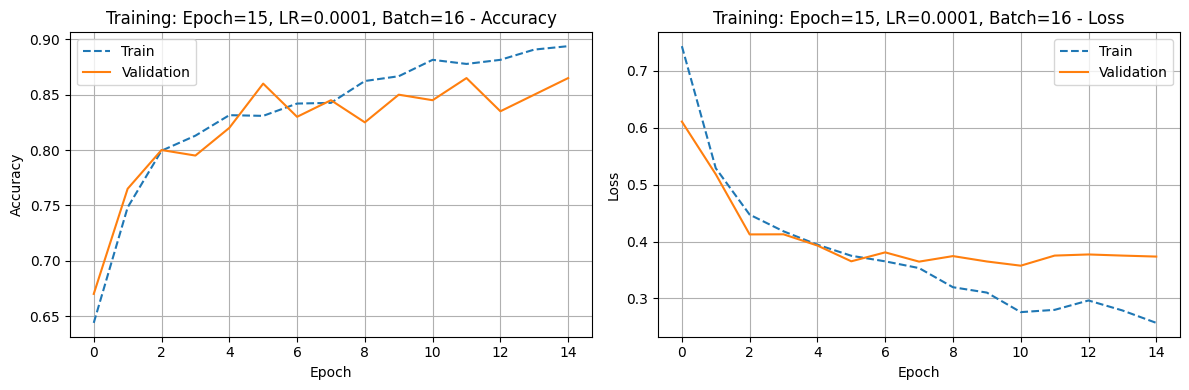

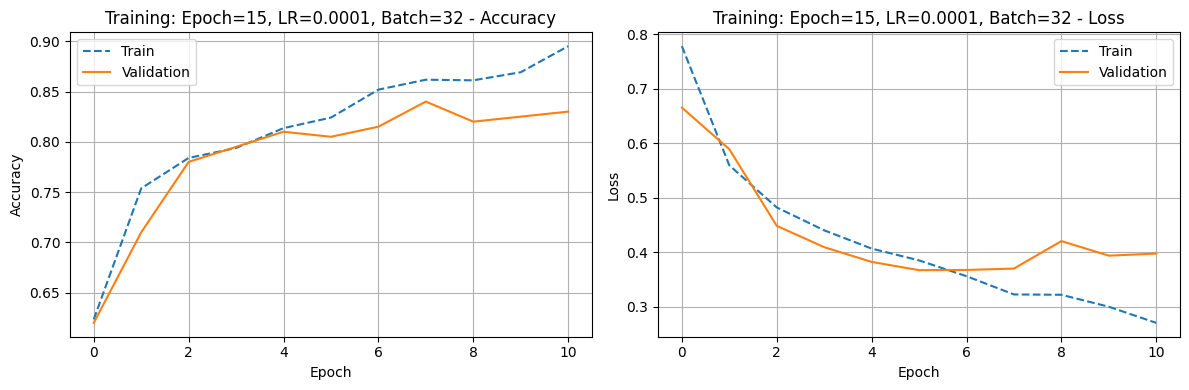

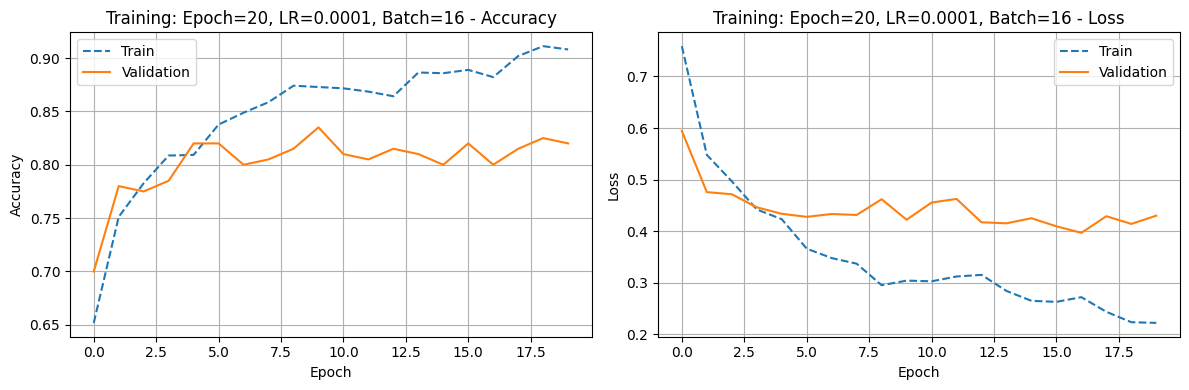

In [11]:
def plot_results_separated(results):
    for name, hist in results.items():
        plt.figure(figsize=(12, 4))

        # Accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(hist.history['accuracy'], linestyle='--', label='Train')
        plt.plot(hist.history['val_accuracy'], linestyle='-', label='Validation')
        plt.title(f"{name} - Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)

        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(hist.history['loss'], linestyle='--', label='Train')
        plt.plot(hist.history['val_loss'], linestyle='-', label='Validation')
        plt.title(f"{name} - Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

plot_results_separated(results_resnet)